In [1]:
#http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import time
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=6,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


labels
  car   cat   car  deer   car  ship


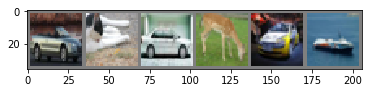

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print ("labels")
print(' '.join('%5s' % classes[labels[j]] for j in range(6)))

In [5]:
print ("type(dataiter):", type(dataiter))
print ("images:", type(images))
print ("labels:", type(labels))


type(dataiter): <class 'torch.utils.data.dataloader.DataLoaderIter'>
images: <class 'torch.FloatTensor'>
labels: <class 'torch.LongTensor'>


In [6]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 5)#original values (3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 16, 5)#original values (6, 16, 5)
        #NB: arg 2 of the first nn.Conv2d, and arg 1 of the second nn.Conv2d – need to be the same value
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
losses = []
start_time = time.time()
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            losses.append(running_loss)
            running_loss = 0.0

print('Finished Training')
print("--- %s seconds ---" % (time.time() - start_time))
#66.24045753479004 seconds
#83.98998093605042 seconds
print ("losses:", losses)

[1,  2000] loss: 2.190
[1,  4000] loss: 1.801
[1,  6000] loss: 1.616
[1,  8000] loss: 1.502
[2,  2000] loss: 1.405
[2,  4000] loss: 1.349
[2,  6000] loss: 1.294
[2,  8000] loss: 1.266
[3,  2000] loss: 1.185
[3,  4000] loss: 1.161
[3,  6000] loss: 1.145
[3,  8000] loss: 1.111
[4,  2000] loss: 1.043
[4,  4000] loss: 1.032
[4,  6000] loss: 1.035
[4,  8000] loss: 1.020
[5,  2000] loss: 0.947
[5,  4000] loss: 0.963
[5,  6000] loss: 0.953
[5,  8000] loss: 0.961
[6,  2000] loss: 0.878
[6,  4000] loss: 0.914
[6,  6000] loss: 0.891
[6,  8000] loss: 0.885
[7,  2000] loss: 0.810
[7,  4000] loss: 0.823
[7,  6000] loss: 0.860
[7,  8000] loss: 0.845
[8,  2000] loss: 0.769
[8,  4000] loss: 0.782
[8,  6000] loss: 0.808
[8,  8000] loss: 0.814
[9,  2000] loss: 0.729
[9,  4000] loss: 0.752
[9,  6000] loss: 0.773
[9,  8000] loss: 0.776
[10,  2000] loss: 0.680
[10,  4000] loss: 0.717
[10,  6000] loss: 0.747
[10,  8000] loss: 0.738
[11,  2000] loss: 0.650
[11,  4000] loss: 0.682
[11,  6000] loss: 0.689
[11,

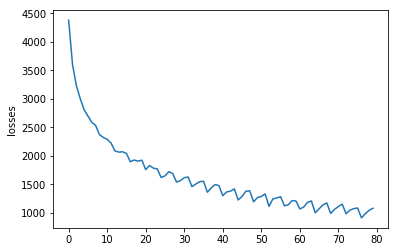

In [10]:
plt.plot(losses)
plt.ylabel('losses')
plt.show()

GroundTruth:    cat  ship  ship plane


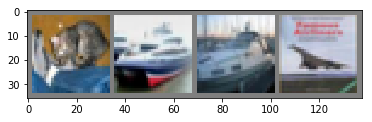

In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [12]:
outputs = net(Variable(images))

In [13]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:    cat  ship  ship plane


In [14]:
start_time = time.time()
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
#start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))
#4.840656042098999 sec
#5.3723766803741455 seconds Accuracy 52%

Accuracy of the network on the 10000 test images: 65 %
--- 5.357727527618408 seconds ---


In [15]:
#NB: chance accuracy would be 10% (10 classes to randomly choose from)

In [16]:
start_time = time.time()
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
print("--- %s seconds ---" % (time.time() - start_time))
# 4.880950212478638 seconds
#5.440716028213501 seconds 


Accuracy of plane : 71 %
Accuracy of   car : 85 %
Accuracy of  bird : 46 %
Accuracy of   cat : 47 %
Accuracy of  deer : 58 %
Accuracy of   dog : 53 %
Accuracy of  frog : 77 %
Accuracy of horse : 67 %
Accuracy of  ship : 73 %
Accuracy of truck : 75 %
--- 5.400704860687256 seconds ---


Accuracy of plane : 70 %  
Accuracy of   car : 49 %  
Accuracy of  bird : 54 %  
Accuracy of   cat : 16 %  
Accuracy of  deer : 36 %   
Accuracy of   dog : 43 %  
Accuracy of  frog : 63 %  
Accuracy of horse : 48 %  
Accuracy of  ship : 73 %  
Accuracy of truck : 62 %  
##---------------------------

Accuracy of plane : 74 %  
Accuracy of   car : 77 %  
Accuracy of  bird : 53 %  
Accuracy of   cat : 41 %  
Accuracy of  deer : 47 %   
Accuracy of   dog : 69 %  
Accuracy of  frog : 73 %  
Accuracy of horse : 65 %  
Accuracy of  ship : 78 %  
Accuracy of truck : 70 %  
##--- 5.47227144241333 seconds ---  
##-------------------------------


In [17]:
net.cuda()

Net(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (conv2): Conv2d(12, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [18]:
torch.cuda.is_available()

True